In [238]:
import seaborn as sns
from sklearn.datasets import load_diabetes

### Dataset

In [246]:
#Dataset
df = pd.read_csv('https://drive.google.com/uc?id=15WAD9_4CpUK6EWmgWVXU8YMnyYLKQvW8&export=download')

### Graph

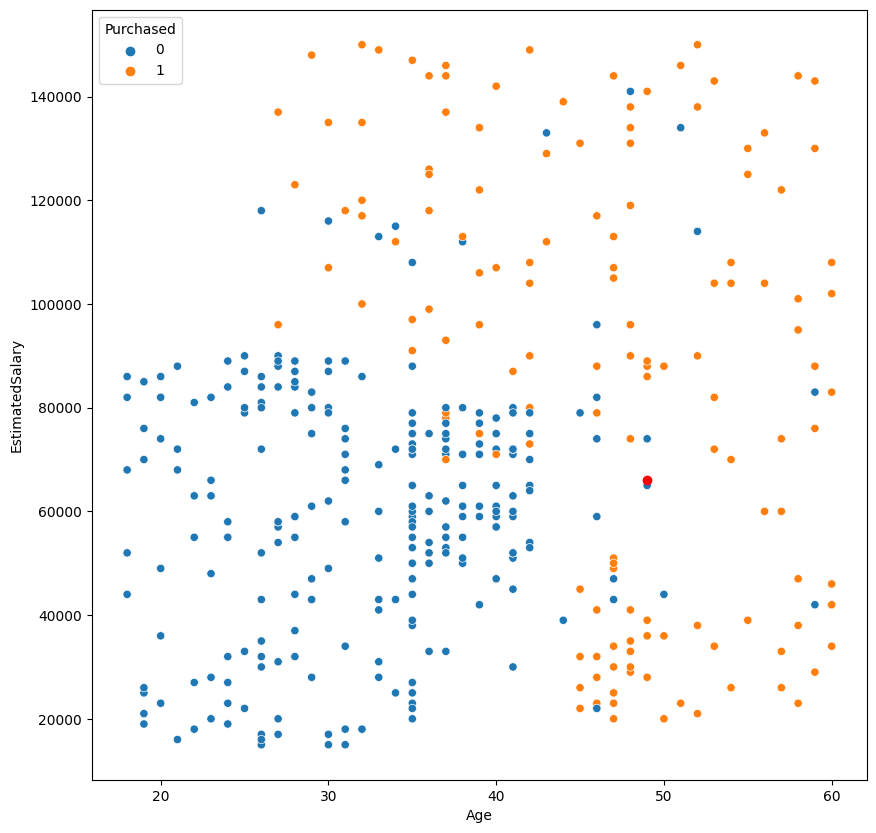

In [249]:
knn = df.copy()
plt.figure(figsize=(10, 10))
_ = sns.scatterplot(x='Age', y='EstimatedSalary',data=knn, hue=df['Purchased'])
plt.scatter(x=49, y=66000, c='red')

In [250]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [252]:
#input new data

def New_data(ids, gender, age, salary):
    return pd.Series({'User ID': ids, 
                      'Gender': gender, 
                      'Age': age,
                      'EstimatedSalary': salary, 
                      'Purchased': None})

### Normalization

In [257]:
def Normalization(series):
    return (series - min(series))/(max(series) - min(series))

In [313]:
# Input new sample
new_input = New_data(123456678, "Female", 30, 33000)

knn['New_Age'] = Normalization(knn['Age'])
knn['New_EstimatedSalary'] = Normalization(knn['EstimatedSalary'])

# Normalizae the new input
x1 = (new_input['Age'] - min(knn['Age']))/ (max(knn['Age']) - min(knn['Age']))
x2 = (new_input['EstimatedSalary'] - min(knn['EstimatedSalary']))/ (max(knn['EstimatedSalary']) - min(knn['EstimatedSalary']))

# Euclidean distance 

knn['distance'] = np.sqrt((x1 - knn['New_Age'])**2 + (x2 - knn['New_EstimatedSalary'])**2)
# Value assignment
new_input['Purchased'] = knn.sort_values('distance')[:9]['Purchased'].value_counts().idxmax()
new_input

User ID                                       123456678
Gender                                           Female
Age                                                  30
EstimatedSalary                                   33000
Purchased          0    9
Name: Purchased, dtype: int64
dtype: object

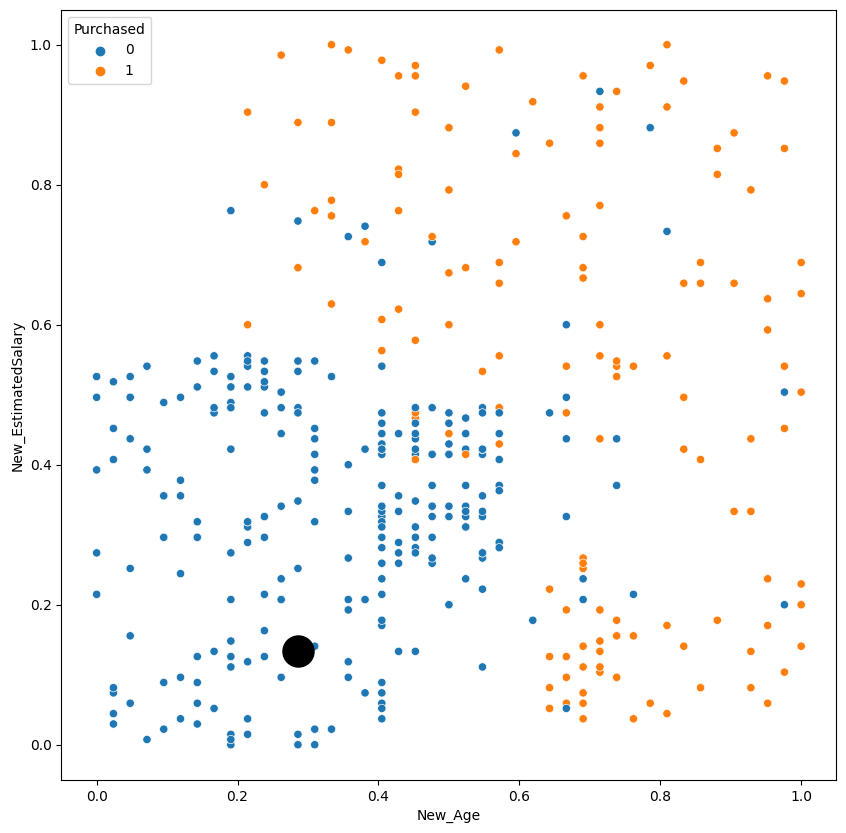

In [310]:
color_map = {0: 'blue', 1: 'orange'}
plt.figure(figsize=(10, 10))
sns.scatterplot(x='New_Age', y='New_EstimatedSalary', data=knn, hue='Purchased')
plt.scatter(x1, x2, c='black', s=500)